In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jul  9 15:34:16 2018

@author: aashish
"""
##Import necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##Compute cost function
def computeCost(X_train, y_train, theta):
    thetaT = np.transpose(theta)
    m = np.matmul(X_train, thetaT)
    inner = np.power((m - y_train), 2)
    h = np.sum(inner) / (2 * len(X_train))
    return h

##Compute the Gradient and update the theta matrix
def gradientDescent(X_train, y_train, theta, alpha, iters):
    
    # Define the temp matrix for theta
    temp = np.matrix(np.zeros(theta.shape))
    
    # Number of parameters to iterate through
    parameters = int(X_train.shape[1])
    
    # cost vector to see how it progresses through each step
    cost = np.zeros(iters + 1)
    cost[0] = computeCost(X_train, y_train, theta)
    
    # Calculate the error at each step
    for i in range(iters):
        error = (X_train * theta.T) - y_train
        
        for j in range(parameters):
            term = np.multiply(error, X_train[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X_train)) * np.sum(term))
            
        theta = temp
        cost[i + 1] = computeCost(X_train, y_train, theta)
        
    return theta, cost

##Import the csv file
#Load dataset
data_set = pd.read_csv('/home/aashish/assignment1/winequality-white.csv', header = 0, sep=';')
data_z = (data_set - data_set.mean()) / data_set.std()
print(data_set.shape)
#Specify hyperparameters
alpha = 0.01
iters = 2000
#Splitting the data into training and testiing
cols = data_z.shape[1]
train = data_z.sample(frac=0.8,random_state=200)
test = data_z.drop(train.index)
X_train = train.iloc[:,0:cols-1]
X_test = test.iloc[:,0:cols-1]
y_train = train.iloc[:,cols-1:cols]
y_test = test.iloc[:,cols-1:cols]
X_train = np.matrix(X_train.values)
X_test = np.matrix(X_test.values)
y_train = np.matrix(y_train.values)
y_test = np.matrix(y_test.values)

theta = np.matrix(np.zeros(shape=[1,X_train.shape[1]]))
print(X_train.shape, y_train.shape, theta.shape)
print ("Initial cost: ", computeCost(X_train, y_train, theta))

g, cost = gradientDescent(X_train, y_train, theta, alpha, iters)
print ("Theta: ", g)
print ("End cost:     ", computeCost(X_train, y_train, g))

##Multiply the optimized theta matrix with the test features
test = np.matmul(X_test, g.T)

#Calculate error value
err = np.subtract(test, y_test)
#Display the predicted, actual and the eror values
data = np.concatenate((test, y_test, err), axis=1)
print(data)

actual_mean = np.mean(y_test)
sse = np.sum(np.power((test-y_test),2))
sst = np.sum(np.power((y_test-actual_mean),2))
r_2 = 1-(sse/sst)
print ("The R-squared value is", r_2)

(4898, 12)
(3918, 11) (3918, 1) (1, 11)
Initial cost:  0.49160324476607936
Theta:  [[ 0.02033025 -0.20832925 -0.00519811  0.26919164 -0.02112524  0.11959203
  -0.0463747  -0.21350342  0.078028    0.07182034  0.39811639]]
End cost:      0.35365486510041994
[[-0.15063926  0.13785607 -0.28849532]
 [ 0.04884744  2.39611362 -2.34726618]
 [-0.14071696  0.13785607 -0.27857302]
 ...
 [-1.21610894 -2.12040149  0.90429255]
 [-0.20540193 -0.99127271  0.78587078]
 [-0.55058048 -0.99127271  0.44069223]]
The R-squared value is 0.2656269350938273


(4898, 12)
(3918, 11) (3918, 1) (1, 11)
Initial cost:  0.49160324476607936
Theta:  [[ 0.02033025 -0.20832925 -0.00519811  0.26919164 -0.02112524  0.11959203
  -0.0463747  -0.21350342  0.078028    0.07182034  0.39811639]]
End cost:      0.35365486510041994


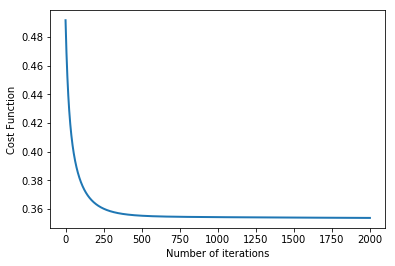

[[-0.15063926  0.13785607 -0.28849532]
 [ 0.04884744  2.39611362 -2.34726618]
 [-0.14071696  0.13785607 -0.27857302]
 ...
 [-1.21610894 -2.12040149  0.90429255]
 [-0.20540193 -0.99127271  0.78587078]
 [-0.55058048 -0.99127271  0.44069223]]
The R-squared value is 0.2656269350938273


In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jul  9 15:34:16 2018

@author: aashish
"""
##Import necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##Compute cost function
def computeCost(X_train, y_train, theta):
    thetaT = np.transpose(theta)
    m = np.matmul(X_train, thetaT)
    inner = np.power((m - y_train), 2)
    h = np.sum(inner) / (2 * len(X_train))
    return h

##Compute the Gradient and update the theta matrix
def gradientDescent(X_train, y_train, theta, alpha, iters):
    
    # Define the temp matrix for theta
    temp = np.matrix(np.zeros(theta.shape))
    
    # Number of parameters to iterate through
    parameters = int(X_train.shape[1])
    
    # cost vector to see how it progresses through each step
    cost = np.zeros(iters + 1)
    cost[0] = computeCost(X_train, y_train, theta)
    
    # Calculate the error at each step
    for i in range(iters):
        error = (X_train * theta.T) - y_train
        
        for j in range(parameters):
            term = np.multiply(error, X_train[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X_train)) * np.sum(term))
            
        theta = temp
        cost[i + 1] = computeCost(X_train, y_train, theta)
        
    return theta, cost

##Import the csv file
#Load dataset
data_set = pd.read_csv('/home/aashish/assignment1/winequality-white.csv', header = 0, sep=';')
data_z = (data_set - data_set.mean()) / data_set.std()
print(data_set.shape)
#Specify hyperparameters
alpha = 0.01
iters = 2000
#Splitting the data into training and testiing
cols = data_z.shape[1]
train = data_z.sample(frac=0.8,random_state=200)
test = data_z.drop(train.index)
X_train = train.iloc[:,0:cols-1]
X_test = test.iloc[:,0:cols-1]
y_train = train.iloc[:,cols-1:cols]
y_test = test.iloc[:,cols-1:cols]
X_train = np.matrix(X_train.values)
X_test = np.matrix(X_test.values)
y_train = np.matrix(y_train.values)
y_test = np.matrix(y_test.values)

theta = np.matrix(np.zeros(shape=[1,X_train.shape[1]]))
print(X_train.shape, y_train.shape, theta.shape)
print ("Initial cost: ", computeCost(X_train, y_train, theta))

g, cost = gradientDescent(X_train, y_train, theta, alpha, iters)
print ("Theta: ", g)
print ("End cost:     ", computeCost(X_train, y_train, g))

plt.plot(cost, linewidth = 2)
plt.ylabel('Cost Function')
plt.xlabel('Number of iterations')
plt.show()
##Multiply the optimized theta matrix with the test features
test = np.matmul(X_test, g.T)

#Calculate error value
err = np.subtract(test, y_test)
#Display the predicted, actual and the eror values
data = np.concatenate((test, y_test, err), axis=1)
print(data)

actual_mean = np.mean(y_test)
sse = np.sum(np.power((test-y_test),2))
sst = np.sum(np.power((y_test-actual_mean),2))
r_2 = 1-(sse/sst)
print ("The R-squared value is", r_2)
